## Imports

In [1]:
import os, glob
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## Google Colab - use this part

### Google Drive pre-requisite

In [ ]:
# Only works within Google Colab
from google.colab import drive
drive.mount('/content/drive')

### Loading the list of HRV files

In [ ]:
# Change of directory to be in the folder where HRV files are
path_to_hrv_files = '/content/drive/MyDrive/core simulateur/data/'
os.chdir(path_to_hrv_files)

In [ ]:
# Create a list that contains all of the files present in the "data" directory ending with ".txt"
list_hrv_files = []
for file in glob.glob("*.txt"):
    list_hrv_files.append(file)

## Jupyter Notebook - use this part

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from DDDS.drive import Drive
import pandas as pd

In [5]:
drive = Drive()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=148070075691-i8797ta0aklhf7r4k4g65dng2efcis07.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A62106%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&state=pdPGWBAwED3L4lg2xyLJk9WVeWLVti&access_type=offline
Connected successfully!


In [6]:
files_list = drive.list('txt')

In [7]:
try:
    files_list.remove({'id': '1-RP7PFAXBlDnUsWAb2ck9mcJ_6uePpbh', 'name': 'Signaux HRV Garmin.txt'})
except:
    pass

In [8]:
try:
    files_list.remove({'id': '1-LZsP3Nm4FfSC7jC47NQBBqW1dfYQoJ2', 'name': 'Signaux HRV multi-capteurs.txt'})
except:
    pass

In [9]:
files_df = pd.DataFrame(files_list)

In [10]:
files_df[files_df.name == "22_11_2021_15_38 eb0.txt"]

,id,name
1,13odd1HA5dv4w2fHFZSpOBk5odAPuPb64,22_11_2021_15_38 eb0.txt


In [11]:
list_hrv_files = list(files_df.name)

## HRV signals

### Generating list of HRV files to download

*   HRV simple sensor 1
*   HRV simple sensor 2
*   HRV garmin sensor

In [12]:
# Create two lists from the list of HRV files - 1 for simple sensor & 1 for garmin sensor
list_hrv_files_simple_sensor = [elem for elem in list_hrv_files if elem.find('garmin') == -1]
list_hrv_files_garmin = [elem for elem in list_hrv_files if elem.find('garmin') != -1]

In [13]:
# Create a list that would be needed to split the simple sensor list into two lists
# It is due to differences in the output of simple sensor files
key_list = []
for key in range(20,31):
    key_list.append(str(key) + '_10_2021')

In [14]:
# Create the two lists from the simple sensor list
list_hrv_files_simple_sensor_1 = []
list_hrv_files_simple_sensor_2 = []
for file in list_hrv_files_simple_sensor:
    if (file[:10] in key_list) and (file != '29_10_2021_13_32 982.txt'):
        list_hrv_files_simple_sensor_2.append(file)
    else:
        list_hrv_files_simple_sensor_1.append(file)

In [15]:
# Create list of Headers for each type of HRV files
headers_list_simple_sensor = ['Timestamp_Google', 'Timestamp_Device', 'Device_id', 'Heart_Rate', 'RR_rate']
headers_list_garmin_sensor = ['Timestamp_Google', 'Timestamp_Device', 'RR_rate']
headers_list_simple_sensor_2 = ['Timestamp_Google', 'Device_id', 'Heart_Rate', 'RR_rate']

In [16]:
# Create a dictionary to match each HRV file with its associated Headers
dict_hrv_files = {
    'sensors_list':[list_hrv_files_simple_sensor_1,list_hrv_files_simple_sensor_2,list_hrv_files_garmin],
    'headers_type':[headers_list_simple_sensor, headers_list_simple_sensor_2, headers_list_garmin_sensor]
}

### Create the list of dataframes

#### Within Google Colab

In [ ]:
# Create the list of dataframes of all the HRV files
def list_dataframes(path_to_hrv_files, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            df = pd.read_csv(path_to_hrv_files + sensor, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [ ]:
dataframes = list_dataframes(path_to_hrv_files, dict_hrv_files)

#### Within Jupyter Notebook

In [17]:
# Create the list of dataframes of all the HRV files
def list_dataframes(files_df, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            file_id = list(files_df[files_df.name == sensor].id)[0]
            file = drive.download(file_id)
            df = pd.read_csv(file, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [18]:
dataframes = list_dataframes(files_df, dict_hrv_files)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |█████████████████████████████████████████

In [19]:
dataframes[0]

,Timestamp_Google,Timestamp_Device,Device_id,Heart_Rate,RR_rate,file_name,Garmin
0,1637591965428,1637591965655,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0
1,1637591965599,1637591965827,CA:93:07:67:1E:FF,80,"[779, 743]",22_11_2021_15_38 eb0.txt,0
2,1637591965832,1637591966046,CD:87:AB:E8:05:12,88,"[724, 832]",22_11_2021_15_38 eb0.txt,0
3,1637591965867,1637591966093,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0
4,1637591966391,1637591966608,FD:9E:84:03:87:71,78,[794],22_11_2021_15_38 eb0.txt,0
...,...,...,...,...,...,...,...
16725,1637596124599,1637596124821,FD:9E:84:03:87:71,0,[],22_11_2021_15_38 eb0.txt,0
16726,1637596124676,1637596124899,CD:87:AB:E8:05:12,97,"[1240, 621]",22_11_2021_15_38 eb0.txt,0
16727,1637596125129,1637596125352,FD:9E:84:03:87:71,0,[],22_11_2021_15_38 eb0.txt,0
16728,1637596125612,1637596125852,FD:9E:84:03:87:71,0,[],22_11_2021_15_38 eb0.txt,0


### Combined all HRV dataframes into a main one (HRV_df)

In [20]:
# Create a main dataframe containing all HRV dataframes combined
def combine_df(df_list):
    for index, df in enumerate(df_list):
        if index == 0:
            HRV_df = df.copy()
        if index != 0:
            HRV_df = pd.concat([HRV_df,df], axis=0, ignore_index=True)
    return HRV_df

In [21]:
HRV_df = combine_df(dataframes)

### Formatting

In [22]:
# Format the Timestamp features
def timestamp_formatting(df, *args):
    for timestamp in args:
        df[timestamp] = df[timestamp].apply(lambda x: pd.Timestamp(x, unit="ms"))
    return df

In [23]:
# Allow to drop useless columns
def drop_columns(df, *args):
    for column in args:
        df.drop(column, axis=1, inplace=True)
    return df

In [24]:
HRV_df = timestamp_formatting(HRV_df, 'Timestamp_Google', 'Timestamp_Device')
HRV_df = drop_columns(HRV_df)

### Combined DataFrame

In [25]:
HRV_df

,Timestamp_Google,Timestamp_Device,Device_id,Heart_Rate,RR_rate,file_name,Garmin
0,2021-11-22 14:39:25.428,2021-11-22 14:39:25.655,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0
1,2021-11-22 14:39:25.599,2021-11-22 14:39:25.827,CA:93:07:67:1E:FF,80,"[779, 743]",22_11_2021_15_38 eb0.txt,0
2,2021-11-22 14:39:25.832,2021-11-22 14:39:26.046,CD:87:AB:E8:05:12,88,"[724, 832]",22_11_2021_15_38 eb0.txt,0
3,2021-11-22 14:39:25.867,2021-11-22 14:39:26.093,FD:9E:84:03:87:71,77,[],22_11_2021_15_38 eb0.txt,0
4,2021-11-22 14:39:26.391,2021-11-22 14:39:26.608,FD:9E:84:03:87:71,78,[794],22_11_2021_15_38 eb0.txt,0
...,...,...,...,...,...,...,...
1425346,2021-11-05 14:06:56.219,2021-11-05 14:06:55.489,NaN,NaN,809,05_11_2021_13_34_garmin ea9.txt,1
1425347,2021-11-05 14:06:57.182,2021-11-05 14:06:56.452,NaN,NaN,951,05_11_2021_13_34_garmin ea9.txt,1
1425348,2021-11-05 14:06:57.188,2021-11-05 14:06:56.458,NaN,NaN,951,05_11_2021_13_34_garmin ea9.txt,1
1425349,2021-11-05 14:06:58.155,2021-11-05 14:06:57.425,NaN,NaN,838,05_11_2021_13_34_garmin ea9.txt,1


In [26]:
ddf = HRV_df[(HRV_df.file_name == '22_11_2021_15_38 eb0.txt') & (HRV_df.Device_id == 'CA:93:07:67:1E:FF')]

In [27]:
ddf.RR_rate

1        [779, 743]
5             [773]
9             [806]
13            [847]
17       [799, 779]
            ...    
16699            []
16703            []
16706            []
16710            []
16714            []
Name: RR_rate, Length: 4156, dtype: object

In [28]:
list_RR = []
for i in ddf.RR_rate:
    if len(i) == 5:
        list_RR.append(int(i[1:4]))
    elif len(i) == 10:
        list_RR.append(int(i[1:4]))
        list_RR.append(int(i[6:9]))
    else:
        pass

In [29]:
x_RR = []
cumul = 0
for i in list_RR:
    cumul += i
    x_RR.append(cumul)

In [30]:
window_start, window_end = 40, 200

In [31]:
list_RR[window_start:window_end+1]

[816,
 838,
 853,
 843,
 829,
 800,
 810,
 812,
 798,
 746,
 767,
 767,
 779,
 758,
 750,
 714,
 693,
 690,
 701,
 720,
 719,
 712,
 779,
 833,
 830,
 854,
 814,
 774,
 759,
 721,
 714,
 728,
 789,
 791,
 805,
 855,
 882,
 825,
 743,
 725,
 701,
 698,
 826,
 803,
 760,
 838,
 863,
 916,
 930,
 840,
 848,
 854,
 867,
 828,
 759,
 772,
 786,
 809,
 836,
 795,
 819,
 860,
 920,
 878,
 794,
 803,
 798,
 799,
 762,
 731,
 747,
 722,
 708,
 671,
 677,
 747,
 881,
 876,
 833,
 810,
 838,
 832,
 743,
 707,
 685,
 666,
 708,
 714,
 701,
 756,
 825,
 848,
 772,
 754,
 770,
 869,
 857,
 853,
 845,
 813,
 840,
 845,
 824,
 744,
 761,
 776,
 806,
 800,
 741,
 754,
 757,
 770,
 730,
 735,
 759,
 830,
 813,
 837,
 844,
 813,
 758,
 761,
 767,
 799,
 800,
 755,
 784,
 831,
 852,
 848,
 763,
 767,
 807,
 841,
 791,
 783,
 764,
 771,
 719,
 736,
 744,
 740,
 751,
 773,
 803,
 790,
 743,
 748,
 761,
 777,
 742,
 720,
 760,
 769,
 764,
 815,
 836,
 818,
 766,
 777,
 792]

In [32]:
import matplotlib.pyplot as plt

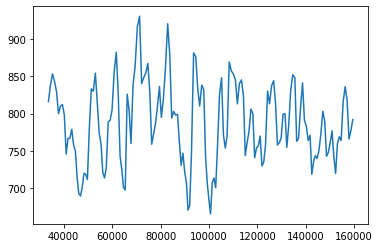

In [33]:
plt.plot(x_RR[window_start:window_end+1], list_RR[window_start:window_end+1])

## Creating the window

In [34]:
x_series = pd.Series(x_RR) - pd.Series(list_RR)

In [35]:
df_window = pd.DataFrame(x_series, columns=['Milliseconds'])

In [36]:
df_window['RR_rate'] = pd.Series(list_RR)

In [37]:
df_window

,Milliseconds,RR_rate
0,0,779
1,779,743
2,1522,773
3,2295,806
4,3101,847
...,...,...
5362,4228137,682
5363,4228819,656
5364,4229475,636
5365,4230111,611


In [38]:
def window(df, start=0, end=300000, column='Milliseconds'):
    return df[(df[column] >= start) & (df[column] <= end)]

In [39]:
window(df_window)

,Milliseconds,RR_rate
0,0,779
1,779,743
2,1522,773
3,2295,806
4,3101,847
...,...,...
377,296186,835
378,297021,817
379,297838,793
380,298631,780


## Creating the features

In [40]:
series_RR = pd.Series(list_RR)

In [41]:
# Standard deviation of NN-intervals in analyzed period
SDNN = series_RR.std()

In [42]:
SDNN

64.46742400856908

In [43]:
RR_diff = series_RR.shift(1) - series_RR

In [44]:
# Standard deviation of successive differences
SDSD = RR_diff.std()

In [45]:
SDSD

39.199819751020414

In [46]:
iterations = int(df_window.Milliseconds.max() / 300000)

In [47]:
list_mean = []
for i in range(iterations):
    list_mean.append(window(df_window, start=i*300000, end=(i+1)*300000).RR_rate.mean())

In [48]:
# Standard deviation of the mean NN-intervals for each five-minute epoch of a long-term recording
SDANN = pd.Series(list_mean).std()

In [49]:
SDANN

14.318593773083126

In [50]:
list_std = []
for i in range(iterations):
    list_std.append(window(df_window, start=i*300000, end=(i+1)*300000).RR_rate.std())

In [51]:
# Mean of the standard deviation of the NN-intervals for each five-minute epoch in a long-term recording
SDNN_index = pd.Series(list_std).mean()

In [52]:
SDNN_index

61.270046213947005

In [53]:
# Root mean square of successive differences of the NN-intervals. Each successive difference between NN-intervals
# is squared and then RMSSD equals the square root of the mean of all squared differences
RMSDD = math.sqrt((RR_diff**2).mean())

In [54]:
RMSDD

39.19616748210377

In [55]:
df_diff = pd.DataFrame(RR_diff.abs(), columns=['Diff'])

In [56]:
df_diff['50ms'] = (df_diff.Diff >= 50) * 1

In [57]:
df_diff['50ms_diff'] = df_diff['50ms'].shift(1)

In [58]:
df_diff['50ms_diff2'] = df_diff['50ms'].shift(2)

In [59]:
df_diff['count_successive_50ms'] = (((df_diff['50ms'] == 1) & (df_diff['50ms_diff'] == 1)) | ((df_diff['50ms'] == 0) & (df_diff['50ms_diff'] == 1) & (df_diff['50ms_diff2'] == 1))) * 1

In [60]:
# Number of successive difference of intervals larger than 50 ms
NN50 = df_diff.count_successive_50ms.sum()

In [61]:
NN50

327

In [62]:
# Number of successive difference of intervals larger than 50 ms as a percentage of the total number of NN-intervals analyzed
pNN50 = (NN50 / len(series_RR)) * 100

In [63]:
print(pNN50, "%")

6.092789267747345 %


In [64]:
# Average difference between maximum and minimum HR during every respiration cycle
# HRmax_HRmin // We do not have this info

In [65]:
series_RR.mode()[0]

785

In [66]:
# HRV triangular index. Calculated by dividing the total number of NN-intervals in the time series by the number
# of times the most frequent interval value occurs
HTI = len(series_RR) / series_RR.mode()[0]

In [67]:
HTI

6.836942675159236

In [68]:
# Triangular interpolation of NN-interval histogram (Requires at least 20 min of recording)
# TINN

In [108]:
wd_df = window(df_window)

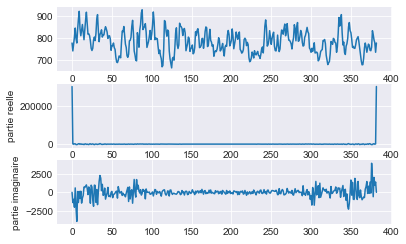

In [109]:
# definition de a
a = wd_df.RR_rate

# visualisation de a
# on ajoute a droite la valeur de gauche pour la periodicite
plt.subplot(311)
plt.plot(np.append(a, a[0]))

# calcul de A
A = np.fft.fft(a)

# visualisation de A
# on ajoute a droite la valeur de gauche pour la periodicite
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

plt.show()

In [112]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values

# rr_intervals_list contains integer values of RR-interval
rr_intervals_list = wd_df.RR_rate

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_intervals_list,  
                                                low_rri=300, high_rri=2000)
# This replace outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                   interpolation_method="linear")

# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replace ectopic beats nan values with linear interpolation
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.


In [113]:
from hrvanalysis import get_time_domain_features

 # nn_intervals_list contains integer values of NN-interval
nn_intervals_list = wd_df.RR_rate

time_domain_features = get_time_domain_features(nn_intervals_list)

In [114]:
time_domain_features

{'mean_nni': 785.7277486910995,
 'sdnn': 51.10957006152259,
 'sdsd': 34.853400142869894,
 'nni_50': 56,
 'pnni_50': 14.698162729658792,
 'nni_20': 198,
 'pnni_20': 51.968503937007874,
 'rmssd': 34.85357447297633,
 'median_nni': 783.0,
 'range_nni': 264,
 'cvsd': 0.044358334717129404,
 'cvnni': 0.06504742914662642,
 'mean_hr': 76.68423029631606,
 'max_hr': 90.09009009009009,
 'min_hr': 64.51612903225806,
 'std_hr': 4.972146252486717}

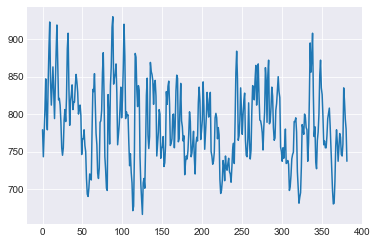

In [115]:
plt.plot(nn_intervals_list)

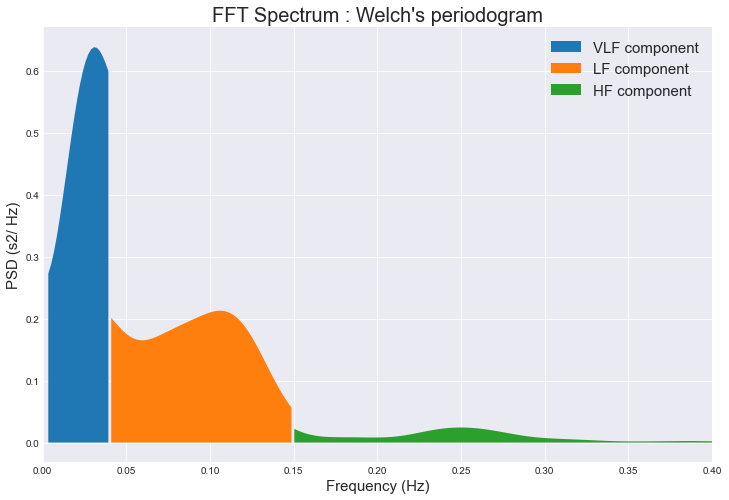

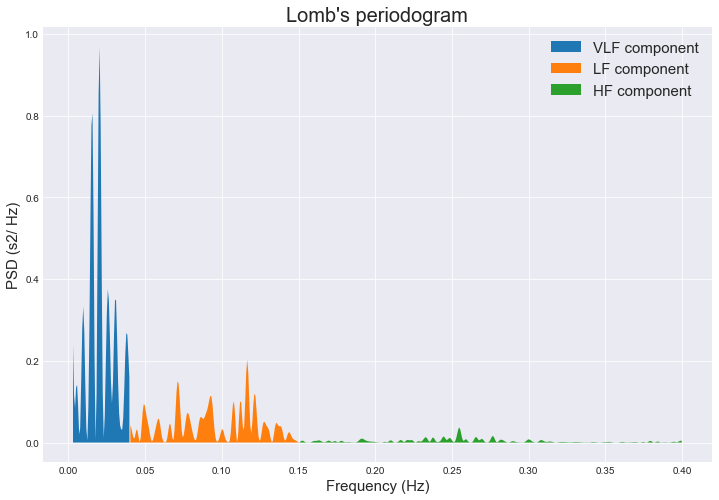

In [116]:
from hrvanalysis import plot_psd

# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = list(wd_df.RR_rate)

plot_psd(nn_intervals_list, method="welch")
plot_psd(nn_intervals_list, method="lomb")

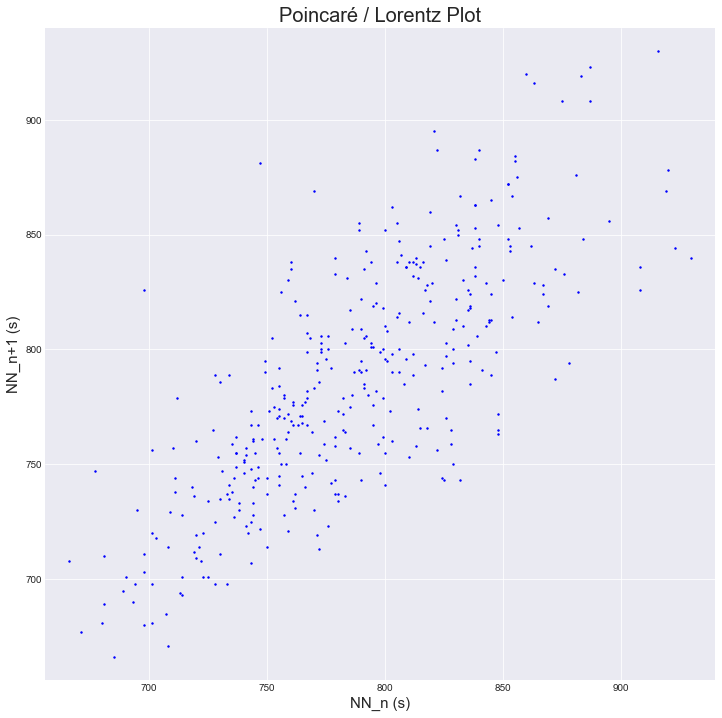

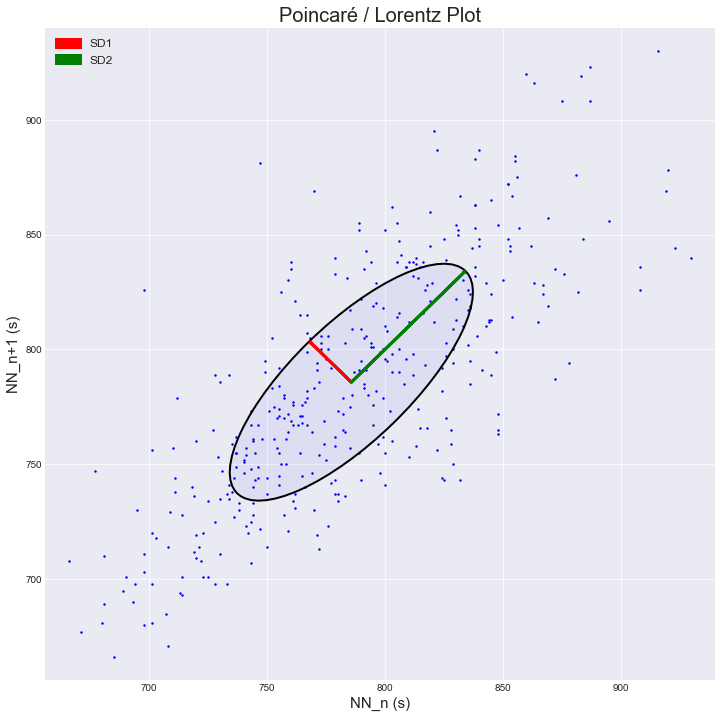

In [117]:
from hrvanalysis import plot_poincare

# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = wd_df.RR_rate

plot_poincare(nn_intervals_list, plot_sd_features=False)
plot_poincare(nn_intervals_list, plot_sd_features=True)

In [143]:
maximum = df_window.Milliseconds.max()

In [144]:
window_size = 300000

In [146]:
max_window = maximum - window_size

In [155]:
#for i in range(0,max_window):
#    wd_df = window(df_window, start=i,end=i+window_size)
#    nn_intervals_list = list(wd_df.RR_rate)
#    plot_psd(nn_intervals_list, method="lomb")
#    plt.show()